# Homework 8

Delay-coordinate embedding of time series data.

**MANY QUESTIONS**

- What if the system you're measuring has some period-doubling going on - then can anything be said about the optimal time delay? It seems like any delay you choose would favor one of the periods more than the other.
- Are there any theorems or anything 

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [21]:
def readData(filename):
    f = open(filename, 'r')
    lines = f.read().strip().replace(' ', '').split('\n')
    data = [float(l) for l in lines]
    return data

In [34]:
# dt: sample interval
# tau: time delay
# m: dimensions to embed in
def delayCoordEmbed(data, dt, tau, m):
    output = []
    delta = tau/dt
    
    w = delta * (m - 1) # total window
    for i in range(len(data) - w):
        v = [data[i + j*delta] for j in range(m)]
        output.append(v)
    return output

In [124]:
def plot2d(data, coordX, coordY):
    plt.plot(
        [v[coordX] for v in data],
        [v[coordY] for v in data],
        'o', color="black", ms=2, mew=0
    )
    plt.show()

def plot3d(data, coordX, coordY, coordZ, angle):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(
            [v[coordX] for v in data],
            [v[coordY] for v in data],
            [v[coordZ] for v in data],
            color="black", s=1
    )
    ax.view_init(0, angle)
    plt.show()

In [127]:
data = readData('hw8.4_amplitude.dat')
print(len(data))
print(min(data), max(data))

5000
(-14.63, 17.27)
(3.61, 4.31)


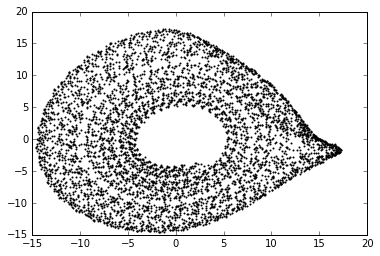

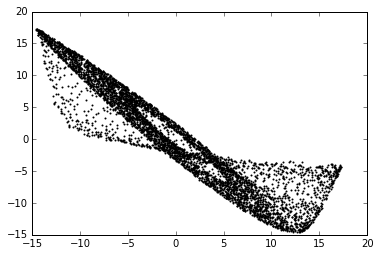

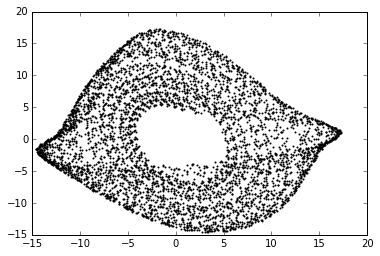

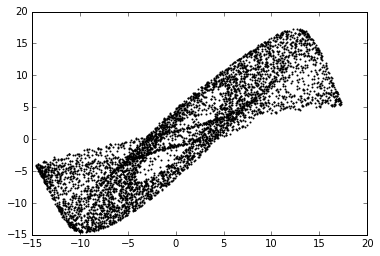

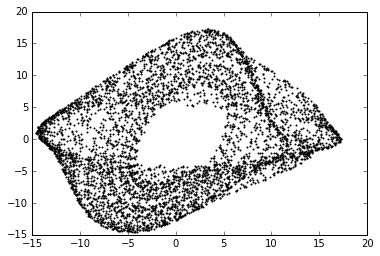

In [82]:
tau = 8
m = 7
embedded = delayCoordEmbed(data, 1, tau, m)

plot2d(embedded, 0,1)
plot2d(embedded, 0,2)
plot2d(embedded, 0,3)
plot2d(embedded, 0,4)
plot2d(embedded, 0,5)

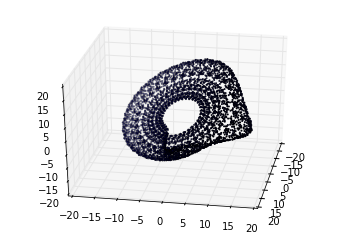

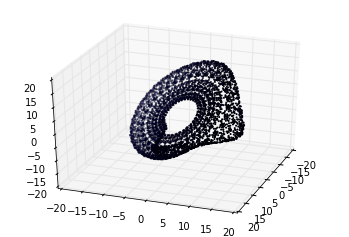

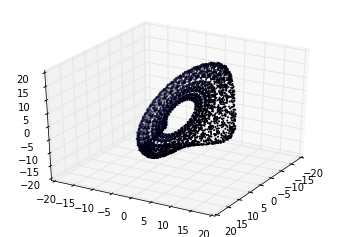

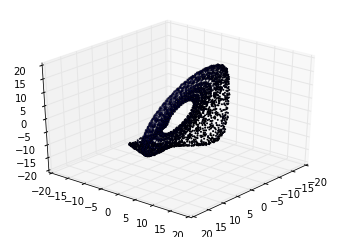

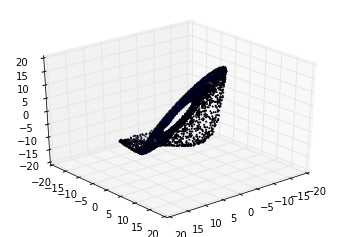

In [123]:
tau = 5
m = 7
embedded = delayCoordEmbed(data, 1, tau, m)
plot3d(embedded, 0, 1, 2, 10)
plot3d(embedded, 0, 1, 2, 20)
plot3d(embedded, 0, 1, 2, 30)
plot3d(embedded, 0, 1, 2, 40)
plot3d(embedded, 0, 1, 2, 50)

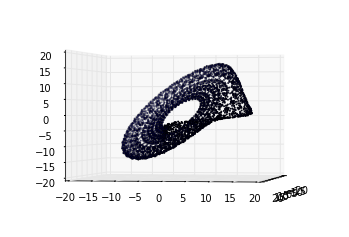

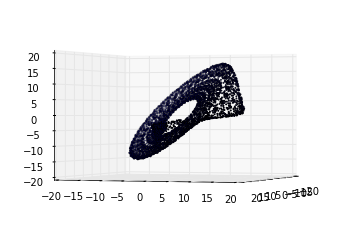

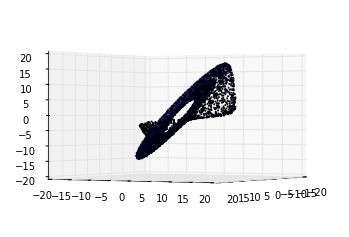

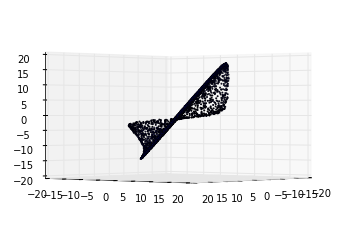

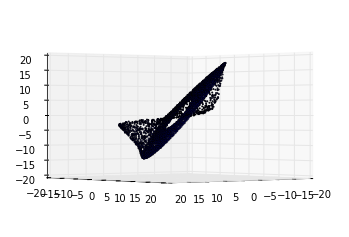

In [126]:
plot3d(embedded, 0, 1, 2, 10), plot3d(embedded, 0, 1, 2, 20)
plot3d(embedded, 0, 1, 2, 30), plot3d(embedded, 0, 1, 2, 40)
plot3d(embedded, 0, 1, 2, 50)

In [131]:
# Unit 8 test
data = [
    1.2,
    1.4,
    1.1,
    0.9,
    0.5,
    0.1,
    -0.2,
    0.3,
    0.4
]

print('Question 11')
tau = 2
m = 2
embedded11 = delayCoordEmbed(data, 1, tau, m)
print(embedded11)

print('Question 12')
tau = 1
m = 3
embedded12 = delayCoordEmbed(data, 1, tau, m)
print(embedded12)

Question 11
[[1.2, 1.1], [1.4, 0.9], [1.1, 0.5], [0.9, 0.1], [0.5, -0.2], [0.1, 0.3], [-0.2, 0.4]]
Question 12
[[1.2, 1.4, 1.1], [1.4, 1.1, 0.9], [1.1, 0.9, 0.5], [0.9, 0.5, 0.1], [0.5, 0.1, -0.2], [0.1, -0.2, 0.3], [-0.2, 0.3, 0.4]]
